# Agenda
1. Overfit vs Underfit, Bias-Variance tradeoff
2. Demo of overfitting
3. Baseline model
4. Smaller model
5. Bigger model
6. Plot train vs test loss
7. Techniques to prevent overfitting

<hr>

### 1. Overfit vs Underfit, Bias-Variance tradeoff
* We have seen that the accuracy of our model on the validation data would peak after training for a number of epochs, and would then start decreasing. This is what is called overfit model.
* Such overfit model is not good for deployment & needs to be addressed.
* The training accuracy is good but not validation/testing accuracy, thus called high variance model.
* Opposite to overfit is underfit, the training accuracy is not yet good. This can happen because of smaller models, over-regularization or small data. This is called high bias models.
* We need to get models with moderate bias & variance.

### 2. Demo of overfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* Using iterator to generate data
* Otherwise, this code will get stuck in 8 GB RAM machine

In [16]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, labels, dimension):
    for seq,label in zip(sequences,labels):
        result = np.zeros((1, dimension))
        res_label = np.array([label])
        for word_indices in seq:
            result[0,word_indices] = 1.0  
        yield result,res_label

### Create a baseline model

In [18]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [19]:
train = multi_hot_sequences(train_data, train_labels, dimension=NUM_WORDS)
test = multi_hot_sequences(test_data, test_labels, dimension=NUM_WORDS)

baseline_history = baseline_model.fit_generator(train,epochs=20,steps_per_epoch=512,verbose=2, validation_data=test, validation_steps= 1000)

Epoch 1/20
512/512 - 2s - loss: 0.6092 - accuracy: 0.5879 - binary_crossentropy: 0.6648 - val_loss: 0.4723 - val_accuracy: 0.7760 - val_binary_crossentropy: 0.4723
Epoch 2/20
512/512 - 1s - loss: 0.4809 - accuracy: 0.7969 - binary_crossentropy: 0.4589 - val_loss: 0.4454 - val_accuracy: 0.7840 - val_binary_crossentropy: 0.4454
Epoch 3/20
512/512 - 1s - loss: 0.3877 - accuracy: 0.8291 - binary_crossentropy: 0.3735 - val_loss: 0.3805 - val_accuracy: 0.8320 - val_binary_crossentropy: 0.3805
Epoch 4/20
512/512 - 1s - loss: 0.4055 - accuracy: 0.8302 - binary_crossentropy: 0.4243 - val_loss: 0.4078 - val_accuracy: 0.8170 - val_binary_crossentropy: 0.4078
Epoch 5/20
512/512 - 1s - loss: 0.3833 - accuracy: 0.8531 - binary_crossentropy: 0.3803 - val_loss: 0.3618 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.3618
Epoch 6/20
512/512 - 1s - loss: 0.3737 - accuracy: 0.8472 - binary_crossentropy: 0.3743 - val_loss: 0.3424 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3424
Epoch 7/20
512/5

### Create a smaller model

In [30]:
smaller_model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [31]:
train = multi_hot_sequences(train_data, train_labels, dimension=NUM_WORDS)
test = multi_hot_sequences(test_data, test_labels, dimension=NUM_WORDS)

smaller_history = smaller_model.fit_generator(train,epochs=20,steps_per_epoch=512,verbose=2, validation_data=test, validation_steps= 1000)

Epoch 1/20
512/512 - 2s - loss: 0.6829 - accuracy: 0.5723 - binary_crossentropy: 0.6829 - val_loss: 0.6745 - val_accuracy: 0.4980 - val_binary_crossentropy: 0.6745
Epoch 2/20
512/512 - 1s - loss: 0.6541 - accuracy: 0.6523 - binary_crossentropy: 0.6541 - val_loss: 0.6267 - val_accuracy: 0.8040 - val_binary_crossentropy: 0.6267
Epoch 3/20
512/512 - 1s - loss: 0.5666 - accuracy: 0.7812 - binary_crossentropy: 0.5666 - val_loss: 0.5601 - val_accuracy: 0.7680 - val_binary_crossentropy: 0.5601
Epoch 4/20
512/512 - 1s - loss: 0.5344 - accuracy: 0.7988 - binary_crossentropy: 0.5344 - val_loss: 0.5315 - val_accuracy: 0.8110 - val_binary_crossentropy: 0.5315
Epoch 5/20
512/512 - 1s - loss: 0.5223 - accuracy: 0.7891 - binary_crossentropy: 0.5223 - val_loss: 0.4931 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.4931
Epoch 6/20
512/512 - 1s - loss: 0.4742 - accuracy: 0.8340 - binary_crossentropy: 0.4742 - val_loss: 0.4465 - val_accuracy: 0.8710 - val_binary_crossentropy: 0.4465
Epoch 7/20
512/5

### Create a bigger model

In [23]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

In [24]:
train = multi_hot_sequences(train_data, train_labels, dimension=NUM_WORDS)
test = multi_hot_sequences(test_data, test_labels, dimension=NUM_WORDS)

bigger_history = bigger_model.fit_generator(train,epochs=20,steps_per_epoch=512,verbose=2, validation_data=test, validation_steps= 1000)

Epoch 1/20
512/512 - 15s - loss: 0.5686 - accuracy: 0.6441 - binary_crossentropy: 0.6527 - val_loss: 0.4570 - val_accuracy: 0.7940 - val_binary_crossentropy: 0.4570
Epoch 2/20
512/512 - 15s - loss: 0.5063 - accuracy: 0.7848 - binary_crossentropy: 0.4717 - val_loss: 0.4727 - val_accuracy: 0.7980 - val_binary_crossentropy: 0.4727
Epoch 3/20
512/512 - 16s - loss: 0.4405 - accuracy: 0.8085 - binary_crossentropy: 0.4373 - val_loss: 0.3964 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3964
Epoch 4/20
512/512 - 16s - loss: 0.4200 - accuracy: 0.8035 - binary_crossentropy: 0.4466 - val_loss: 0.4433 - val_accuracy: 0.8130 - val_binary_crossentropy: 0.4433
Epoch 5/20
512/512 - 15s - loss: 0.4190 - accuracy: 0.8389 - binary_crossentropy: 0.4301 - val_loss: 0.3747 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.3747
Epoch 6/20
512/512 - 15s - loss: 0.3965 - accuracy: 0.8484 - binary_crossentropy: 0.4061 - val_loss: 0.3479 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3479
Epoch 7/20

### Comparing Models

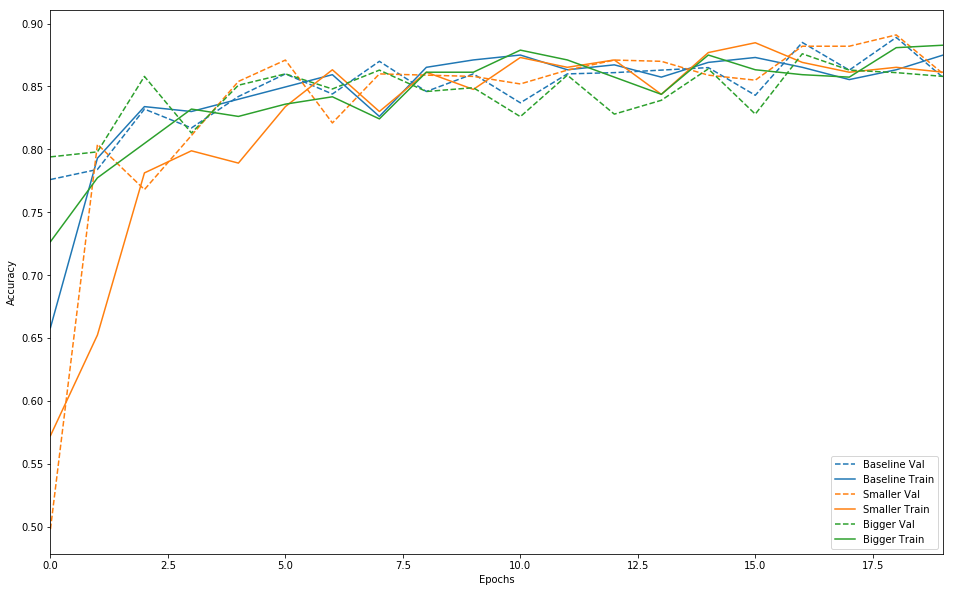

In [32]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [28]:
baseline_history.history.keys()

dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy'])

### More Strategies to prevent overfitting
* Add weight regularization
* Add dropout
* Batch Normalization

#### Weight Regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.

* L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization introduces sparsity to make some of your weight parameters zero. L2 regularization will penalize the weights parameters without making them sparse—one reason why L2 is more common.

In [33]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [34]:
train = multi_hot_sequences(train_data, train_labels, dimension=NUM_WORDS)
test = multi_hot_sequences(test_data, test_labels, dimension=NUM_WORDS)

l2_history = l2_model.fit_generator(train,epochs=20,steps_per_epoch=512,verbose=2, validation_data=test, validation_steps= 1000)

Epoch 1/20
512/512 - 3s - loss: 0.5933 - accuracy: 0.6895 - binary_crossentropy: 0.5728 - val_loss: 0.4803 - val_accuracy: 0.7890 - val_binary_crossentropy: 0.4489
Epoch 2/20
512/512 - 2s - loss: 0.5190 - accuracy: 0.7910 - binary_crossentropy: 0.4767 - val_loss: 0.4853 - val_accuracy: 0.7960 - val_binary_crossentropy: 0.4317
Epoch 3/20
512/512 - 2s - loss: 0.4385 - accuracy: 0.8359 - binary_crossentropy: 0.3758 - val_loss: 0.4407 - val_accuracy: 0.8350 - val_binary_crossentropy: 0.3711
Epoch 4/20
512/512 - 3s - loss: 0.4890 - accuracy: 0.8262 - binary_crossentropy: 0.4107 - val_loss: 0.5004 - val_accuracy: 0.8120 - val_binary_crossentropy: 0.4166
Epoch 5/20
512/512 - 2s - loss: 0.4768 - accuracy: 0.8379 - binary_crossentropy: 0.3875 - val_loss: 0.4556 - val_accuracy: 0.8350 - val_binary_crossentropy: 0.3614
Epoch 6/20
512/512 - 2s - loss: 0.4815 - accuracy: 0.8496 - binary_crossentropy: 0.3823 - val_loss: 0.4386 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3360
Epoch 7/20
512/5

* l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

* Here's the impact of our L2 regularization penalty:

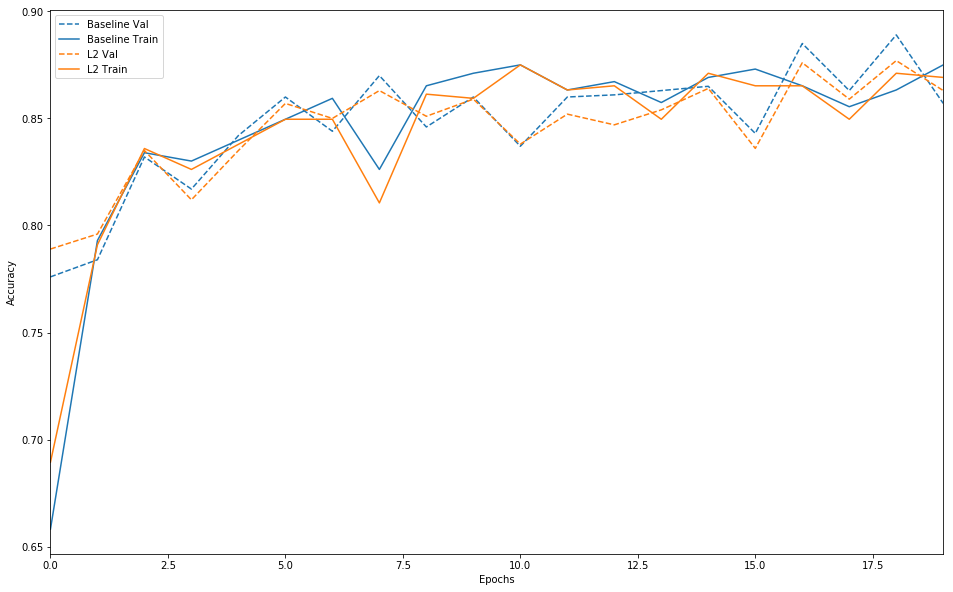

In [36]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])

#### Add Dropout
* Dropout is one of the most effective and most commonly used regularization techniques for neural networks.
* Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. 
* Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. 

In [40]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [41]:
train = multi_hot_sequences(train_data, train_labels, dimension=NUM_WORDS)
test = multi_hot_sequences(test_data, test_labels, dimension=NUM_WORDS)

dpt_history = dpt_model.fit_generator(train,epochs=20,steps_per_epoch=512,verbose=2, validation_data=test, validation_steps= 1000)

Epoch 1/20
512/512 - 2s - loss: 0.6713 - accuracy: 0.6074 - binary_crossentropy: 0.6713 - val_loss: 0.5833 - val_accuracy: 0.7760 - val_binary_crossentropy: 0.5833
Epoch 2/20
512/512 - 2s - loss: 0.5772 - accuracy: 0.6875 - binary_crossentropy: 0.5772 - val_loss: 0.4682 - val_accuracy: 0.8180 - val_binary_crossentropy: 0.4682
Epoch 3/20
512/512 - 2s - loss: 0.4771 - accuracy: 0.7832 - binary_crossentropy: 0.4771 - val_loss: 0.4029 - val_accuracy: 0.8400 - val_binary_crossentropy: 0.4029
Epoch 4/20
512/512 - 2s - loss: 0.4668 - accuracy: 0.8203 - binary_crossentropy: 0.4668 - val_loss: 0.4008 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.4008
Epoch 5/20
512/512 - 2s - loss: 0.4617 - accuracy: 0.8047 - binary_crossentropy: 0.4617 - val_loss: 0.4284 - val_accuracy: 0.8070 - val_binary_crossentropy: 0.4284
Epoch 6/20
512/512 - 2s - loss: 0.4159 - accuracy: 0.8242 - binary_crossentropy: 0.4159 - val_loss: 0.3541 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3541
Epoch 7/20
512/5

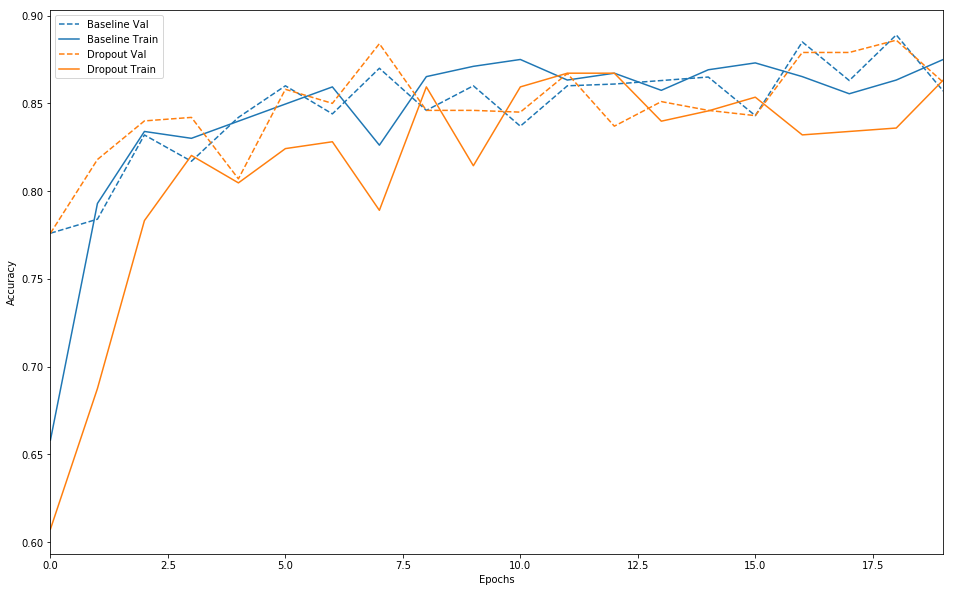

In [42]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_history)])